# Preparar os dados

In [1]:
# baixei os dados referentes aos 12 meses de 2021.
# como os dados de cada mês vieram um em cada arquivo .csv é necessário juntá-los

In [2]:
import pandas as pd
import glob
import os
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
files = os.path.join("F:\\Aulas\\Análise de dados Google\\Capstone\dados","2021*.csv")
files = glob.glob(files)

df = pd.concat(map(pd.read_csv, files), ignore_index = True)

In [4]:
# algumas informações sobre os dados

In [5]:
df.shape

(5595063, 13)

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


In [8]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.595063e+06,5.595063e+06,5.590292e+06,5.590292e+06
mean,4.190107e+01,-8.764605e+01,4.190134e+01,-8.764626e+01
std,4.608635e-02,2.872111e-02,4.618916e-02,2.889959e-02
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01
25%,4.188155e+01,-8.766000e+01,4.188184e+01,-8.766000e+01
50%,4.189897e+01,-8.764182e+01,4.189964e+01,-8.764275e+01
75%,4.192914e+01,-8.762773e+01,4.192920e+01,-8.762775e+01
max,4.207000e+01,-8.752000e+01,4.216812e+01,-8.749000e+01


In [9]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

# Processar os dados

In [10]:
# tenho que transformar os dados de data e tudo relacionado às estações, menos o nome delas.
# tenho que deletar as linhas que possuem valor nulo, pois algumas não possuem end_station_id 
# e end_station_name por exemplo

In [11]:
# retirando as linhas que possuem o end_station_name ou end_station_id com valores nulos
# não sei se isso afetaria alguma análise posterior mas é melhor evitar problemas

df1 = df[df['end_station_id'].notna()|df['end_station_name'].notna()]

In [12]:
#convertendo as colunas com dados de data para o formato apropriado

df1['started_at'] = pd.to_datetime(df['started_at'])
df1['ended_at'] = pd.to_datetime(df['ended_at'])

C:\Users\alanf\AppData\Local\Temp/ipykernel_2632/4008155176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['started_at'] = pd.to_datetime(df['started_at'])
C:\Users\alanf\AppData\Local\Temp/ipykernel_2632/4008155176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ended_at'] = pd.to_datetime(df['ended_at'])


In [13]:
df1.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [14]:
df1['ride_id'].str.len().describe() 
#checando se não tem nenhum id incorreto com um valor de caracteres diferente de 16
#como o std = 0 e todos os outros parâmetros assumem valor = 16 então tá tudo correto

count    4855893.0
mean          16.0
std            0.0
min           16.0
25%           16.0
50%           16.0
75%           16.0
max           16.0
Name: ride_id, dtype: float64

In [15]:
#também é necessário verificar se existe algum duplicada no nosso dataframe, visto que 
#os ride_id são a priori unicos

In [16]:
df1.drop_duplicates(subset=['ride_id'])

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595051,E06135F650553F21,electric_bike,2021-12-07 15:55:37,2021-12-07 16:00:17,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,41.881372,-87.640042,41.888456,-87.644336,casual
5595055,8DF0DBB049906332,electric_bike,2021-12-01 16:50:52,2021-12-01 16:55:18,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,41.881999,-87.639265,41.888415,-87.644342,casual
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member


In [17]:
#o número de linhas não mudaram, então não temos duplicatas

In [18]:
#criando novas colunas para relacionar à duração da viagem
df1['initial_time'] = df1['started_at'].dt.time
df1['final_time'] = df1['ended_at'].dt.time

C:\Users\alanf\AppData\Local\Temp/ipykernel_2632/839785015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['initial_time'] = df1['started_at'].dt.time
C:\Users\alanf\AppData\Local\Temp/ipykernel_2632/839785015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['final_time'] = df1['ended_at'].dt.time


In [19]:
#calculando a duração da viagem em uma nova coluna

td = df1['ended_at'] - df1['started_at']
df1['duration'] = td.dt.seconds/60 #converteu tudo pra segundo depois pra minutos


C:\Users\alanf\AppData\Local\Temp/ipykernel_2632/4266771088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['duration'] = td.dt.seconds/60 #converteu tudo pra segundo depois pra minutos


In [20]:
#criando uma nova coluna relacionada ao dia em que a viagem foi feita
#0 = segunda, 6=domingo
df1['day_of_week'] = df1['started_at'].dt.dayofweek


C:\Users\alanf\AppData\Local\Temp/ipykernel_2632/195087175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day_of_week'] = df1['started_at'].dt.dayofweek


In [21]:
df1['initial_hour'] = df1['started_at'].dt.hour

C:\Users\alanf\AppData\Local\Temp/ipykernel_2632/1438021033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['initial_hour'] = df1['started_at'].dt.hour


In [22]:
df1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,initial_time,final_time,duration,day_of_week,initial_hour
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,19:15:38,19:22:51,7.216667,6,19
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,12:57:38,13:02:10,4.533333,5,12
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,15:28:04,15:37:51,9.783333,5,15
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,15:28:57,15:37:54,8.950000,5,15
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,15:56:59,16:07:08,10.150000,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595051,E06135F650553F21,electric_bike,2021-12-07 15:55:37,2021-12-07 16:00:17,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,41.881372,-87.640042,41.888456,-87.644336,casual,15:55:37,16:00:17,4.666667,1,15
5595055,8DF0DBB049906332,electric_bike,2021-12-01 16:50:52,2021-12-01 16:55:18,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,41.881999,-87.639265,41.888415,-87.644342,casual,16:50:52,16:55:18,4.433333,2,16
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member,19:37:50,19:44:51,7.016667,0,19
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member,08:57:04,09:05:21,8.283333,3,8


# Análise

In [23]:
'''
Agora que os dados estão limpos, organizados e inserimos novas colunas com informações relevantes sobre
as viagens de bicicleta, podemos começar a etapa de análise.
'''

'\nAgora que os dados estão limpos, organizados e inserimos novas colunas com informações relevantes sobre\nas viagens de bicicleta, podemos começar a etapa de análise.\n'

In [24]:
# Estatistica acerca da duração de viagem
df1['duration'].describe()

count    4.855893e+06
mean     1.991021e+01
std      3.815051e+01
min      0.000000e+00
25%      6.950000e+00
50%      1.221667e+01
75%      2.201667e+01
max      1.439983e+03
Name: duration, dtype: float64

In [25]:
# Qual o dia da semana que as pessoas mais usam bicicleta? 
df1['day_of_week'].mode()
# Sábado é o dia que mais usam bicicleta

0    5
dtype: int64

(-1.1120004713524507,
 1.127295889962423,
 -1.1097119462728955,
 1.1004625198663247)

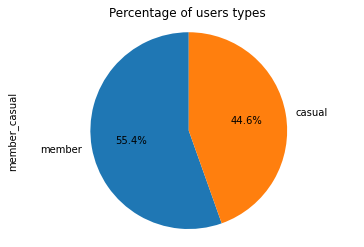

In [57]:
df1['member_casual'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90,y=None)
plt.title('Percentage of users types ')
plt.axis('equal')

In [27]:
df1.groupby('member_casual')['duration'].mean()

member_casual
casual    28.134210
member    13.299437
Name: duration, dtype: float64

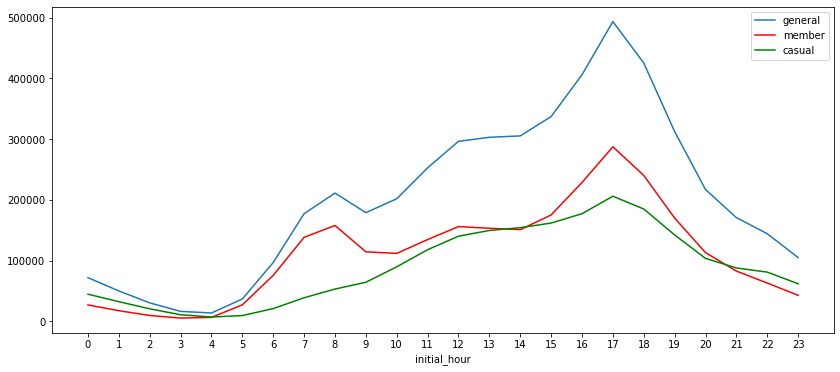

In [46]:
df1.groupby('initial_hour')['initial_hour'].count().plot(kind='line',figsize=(14,6),label='general',legend='general').set_xticks(range(0,24,1))
df1[df1['member_casual'] == 'member'].groupby('initial_hour')['initial_hour'].count().plot(kind='line',figsize=(14,6),color='red',label='member',legend='member').set_xticks(range(0,24,1))
df1[df1['member_casual'] == 'casual'].groupby('initial_hour')['initial_hour'].count().plot(kind='line',figsize=(14,6),color='green',label='casual',legend='casual').set_xticks(range(0,24,1))

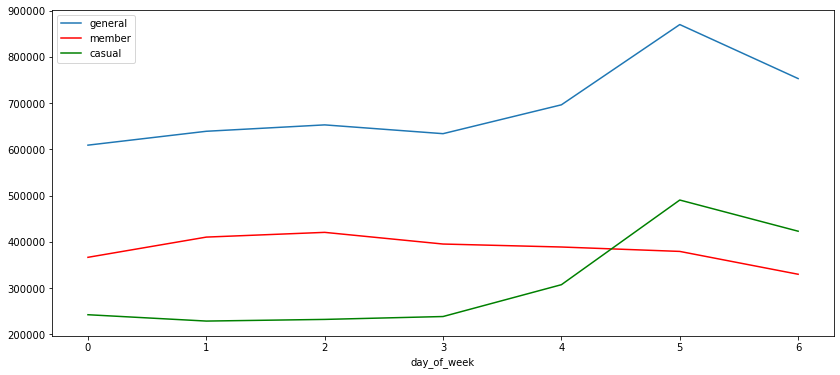

In [45]:
df1.groupby('day_of_week')['day_of_week'].count().plot(kind='line',figsize=(14,6),label='general',legend='general').set_xticks(range(0,7,1))
df1[df1['member_casual'] == 'member'].groupby('day_of_week')['day_of_week'].count().plot(kind='line',figsize=(14,6),color='red',label='member',legend='member').set_xticks(range(0,7,1))
df1[df1['member_casual'] == 'casual'].groupby('day_of_week')['day_of_week'].count().plot(kind='line',figsize=(14,6),color='green',label='casual',legend='casual').set_xticks(range(0,7,1))